# 1) Import Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

%matplotlib inline
sns.set(rc={'figure.figsize': [7, 7]}, font_scale=1.2)

# 2) Load Data

In [2]:
students = pd.read_csv('Students.csv')
students

,Hours,Marks
0,0,34
1,1,36
2,1,33
3,1,39
4,1,42
5,2,45
6,2,38
7,3,45
8,3,53
9,3,46


# 3) Data Analysis

In [3]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
Hours    30 non-null int64
Marks    30 non-null int64
dtypes: int64(2)
memory usage: 608.0 bytes


In [4]:
students.describe()

,Hours,Marks
count,30.000000,30.000000
mean,5.200000,61.400000
std,3.188341,17.734828
min,0.000000,33.000000
25%,3.000000,45.250000
50%,5.000000,60.000000
75%,7.750000,77.000000
max,11.000000,89.000000


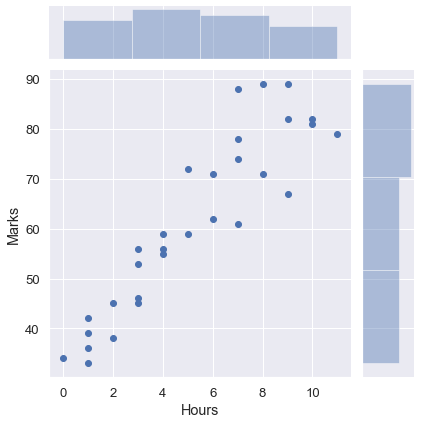

In [5]:
sns.jointplot(x='Hours', y='Marks', data=students)

# 4) Data Preprocessing

In [12]:
x = students['Hours'].values.reshape(-1, 1)
y = students['Marks']

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [14]:
x_train.shape

(21, 1)

In [15]:
x_test.shape

(9, 1)

In [16]:
y_train.shape

(21,)

In [17]:
y_test.shape

(9,)

# 5) Train Model

In [18]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# 6) Test Model on `x_test`


In [19]:
y_predict = model.predict(x_test)
y_predict

array([85.04609767, 59.95823825, 75.0109539 , 64.97581013, 49.92309448,
       49.92309448, 85.04609767, 80.02852579, 54.94066636])

In [20]:
y_test

27    81
15    59
23    89
17    71
8     53
9     46
28    82
24    82
12    55
Name: Marks, dtype: int64

# 7) Calculate R2 Score

In [21]:
model.score(x_train, y_train)

0.8111744903394346

In [22]:
model.score(x_test, y_test)

0.8538655334937386

## 8) Calculate Root Mean Square Error


In [23]:
from sklearn.metrics import mean_squared_error

In [24]:
mean_squared_error(y_test, y_predict)

31.92226235014555

In [25]:
np.sqrt(mean_squared_error(y_test, y_predict))

5.649978969000287

# 9) Test Model on custom data

In [26]:
model.predict([[5]])

array([59.95823825])

In [27]:
model.predict([[7]])

array([69.99338202])

# 10) Get Model Parameters


In [28]:
model.coef_

array([5.01757188])

In [29]:
model.intercept_

34.87037882245549

**h(x) = 34.87 + 5 * x**

# 11) Visualize Model

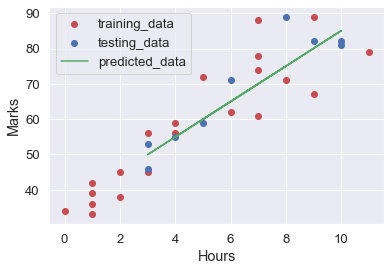

In [30]:
plt.plot(x_train, y_train, 'ro', label='training_data')
plt.plot(x_test, y_test, 'bo', label='testing_data')
plt.plot(x_test, y_predict, 'g-', label='predicted_data')
plt.xlabel('Hours')
plt.ylabel('Marks')
plt.legend()

Linear Regression gives a high accury with this data , it gets the highest score at 4 Hours and it's even better with testing data than training data but overall , it predicts values in an acceptable range